In [5]:
import numpy as np
import arepo
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import h5py as h5
import matplotlib as mpl

import re
import astropy.units as u
from scipy.spatial import cKDTree

import agama
agama.setUnits(mass=1E10, length=1, velocity=1)

time_conv = 977.79222167

In [2]:
sim_list = ['Nbody', 'phantom-vacuum-Sg20-Rc3.5']

basepath = '/n/holystore01/LABS/hernquist_lab/Users/abeane/starbar_runs/runs/'

def read_snap(idx, sim_idx, lvl='lvl3', parttype=[0], fields=['Coordinates', 'Masses', 'Velocities'],
              basepath = basepath):
    fname = basepath + sim_list[sim_idx] + '/' + lvl + '/output'
    return arepo.Snapshot(fname, idx, parttype=parttype, fields=fields, combineFiles=True)

In [3]:
sn0 = read_snap(0, 0, lvl='lvl3-GMCs', parttype=[2, 3, 5])
sn200 = read_snap(200, 0, lvl='lvl3-GMCs', parttype=[2, 3, 5])

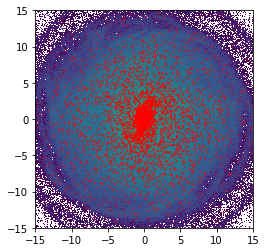

In [13]:
rng = [[-15., 15.], [-15., 15.]]
nres = int(256 * 3 / 2)

sn = sn0
pos = np.concatenate((sn.part2.pos.value, sn.part3.pos.value))
pos_GMC = sn.part5.pos.value

# heatmap, _, _ = np.histogram2d(metr_list[:,1], metr_list[:,2]/metr_list[:,3], range=rng, bins=(nres, nres))
heatmap, _, _ = np.histogram2d(pos[:,0], pos[:,1], range=rng, bins=(nres, nres))
extent = [rng[0][0], rng[0][1], rng[1][0], rng[1][1]]

fig, ax = plt.subplots(1, 1)
ax.imshow(heatmap.T, extent=extent, origin='lower', norm=mpl.colors.LogNorm())
ax.scatter(pos_GMC[:,0], pos_GMC[:,1], c='r', s=0.2)
ax.set(xlim=rng[0], ylim=rng[1])
ax.set_aspect('equal')
plt.show()

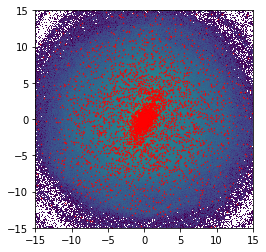

In [14]:
rng = [[-15., 15.], [-15., 15.]]
nres = int(256 * 3 / 2)

sn = sn200
pos = np.concatenate((sn.part2.pos.value, sn.part3.pos.value))
pos_GMC = sn.part5.pos.value

# heatmap, _, _ = np.histogram2d(metr_list[:,1], metr_list[:,2]/metr_list[:,3], range=rng, bins=(nres, nres))
heatmap, _, _ = np.histogram2d(pos[:,0], pos[:,1], range=rng, bins=(nres, nres))
extent = [rng[0][0], rng[0][1], rng[1][0], rng[1][1]]

fig, ax = plt.subplots(1, 1)
ax.imshow(heatmap.T, extent=extent, origin='lower', norm=mpl.colors.LogNorm())
ax.scatter(pos_GMC[:,0], pos_GMC[:,1], c='r', s=0.2)
ax.set(xlim=rng[0], ylim=rng[1])
ax.set_aspect('equal')
plt.show()

In [16]:
sn0.MassTable[5]/sn.MassTable[2]

127.99439925 